# Построение графиков
### По данным, созданным файлами: low_rank.cpp и ar.cpp

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def C_2(k, t):
    return (1 / ((1 + t) ** 2)) * np.exp(-1 * (k-1) * np.log(1 + 1 / t))

In [3]:
def C_2_sec_moment(t, limit):
    sum = 0.0
    for i in range(1, limit):
        sum += C_2(i, t) * i * i
    return sum

In [4]:
def C_i_plus_j(k, t):
    pre_res = 1
    for i in range(2, k + 1):
        pre_res *= (k / i)
    pre_res *= np.exp(-t)
    pre_res *= (1 - np.exp(-t)) ** (k - 1)
    pre_res *= np.exp(-k * (1 - np.exp(-t)))
    return pre_res

In [5]:
def C_i_plus_j_sec_moment(t, limit):
    sum = 0.0
    for i in range(1, limit):
        sum += C_i_plus_j(i, t) * i * i
    return sum

In [6]:
def get_data():
    time_lr = open('time_lr.txt','r').read().split()
    second_moment_lr = open('second_moments_lr.txt', 'r').read().split()
    max_sizes_lr = open('max_sizes_lr.txt', 'r').read().split()
    conc_end_lr = open('concentrations_end_lr.txt', 'r').read().split()
    conc_time_lr = open('concentration_time_lr.txt', 'r').read().split()
    special_information_lr = open('special_information_lr.txt', 'r').read().split()
    
    time_ar = open('time_ar.txt','r').read().split()
    second_moment_ar = open('second_moments_ar.txt', 'r').read().split()
    max_sizes_ar = open('max_sizes_ar.txt', 'r').read().split()
    conc_end_ar = open('concentrations_end_ar.txt', 'r').read().split()
    conc_time_ar = open('concentration_time_ar.txt', 'r').read().split()
    special_information_ar = open('special_information_ar.txt', 'r').read().split()

    time_lr = list(map(float, time_lr))
    conc_end_lr = list(map(float, conc_end_lr))
    max_sizes_lr = list(map(float, max_sizes_lr))
    second_moment_lr = list(map(float, second_moment_lr))
    conc_time_lr = list(map(float, conc_time_lr))
    special_information_lr = list(map(float, special_information_lr))

    time_ar = list(map(float, time_ar))
    conc_end_ar = list(map(float, conc_end_ar))
    max_sizes_ar = list(map(float, max_sizes_ar))
    second_moment_ar = list(map(float, second_moment_ar))
    conc_time_ar = list(map(float, conc_time_ar))
    special_information_ar = list(map(float, special_information_ar))
    
    result = (time_lr, second_moment_lr, max_sizes_lr, conc_end_lr, conc_time_lr, special_information_lr,
              time_ar, second_moment_ar, max_sizes_ar, conc_end_ar, conc_time_ar, special_information_ar
             )
    return result

In [102]:
test_group = [
    {
     'name' : 'K_ij = (i / j) ^ 0.98 + (j / i) ^0.98, N = 100000, lamda = 0.005', # only for low_rank
     'Kernel': 5, 
     'rank': 2,  
     'max_time' : 250.0,
     'N_0' : 100000,
     'lamda' : 0.005,
     'log_period' : 10000
    },
    {
     'name' : 'K_ij = (i / j) ^ 0.98 + (j / i) ^0.98, N = 1000000, lamda = 0.005', # Long test
     'Kernel': 5, 
     'rank': 2,  
     'max_time' : 250.0,
     'N_0' : 1000000,
     'lamda' : 0.005,
     'log_period' : 10000
    },
    
    {
     'name' : 'K_ij = (i / j) ^ 0.95 + (j / i) ^0.95', # only for low_rank
     'Kernel': 6, 
     'rank': 2,  
     'max_time' : 150.0,
     'N_0' : 100000,
     'lamda' : 0.01,
     'log_period' : 10000
    },
    
    {
     'name' : 'C_ij = 2, N = 100000, lamda = 0',
     'Kernel': 3, 
     'rank': 1,  
     'max_time' : 10,
     'N_0' : 100000,
     'lamda' : 0.00,
     'log_period' : 10,
     'true_function' : C_2,
     'second_moment' : C_2_sec_moment
    },
    
    {
     'name' : 'C_ij = i + j, N = 100000, lamda = 0',
     'Kernel': 4,
     'rank': 2,
     'max_time' : 2.0,
     'N_0' : 100000,
     'lamda' : 0.00,
     'log_period' : 100,
     'true_function' : C_i_plus_j,
     'second_moment' : C_i_plus_j_sec_moment
    }
    
]

In [103]:
w = 2

K_ij = (i / j) ^ 0.95 + (j / i) ^0.95 
Rank of kernel: 2 
Max_time: 150.0 
log_period:  10000
Время работы low-rank алгоритма: 1177.4


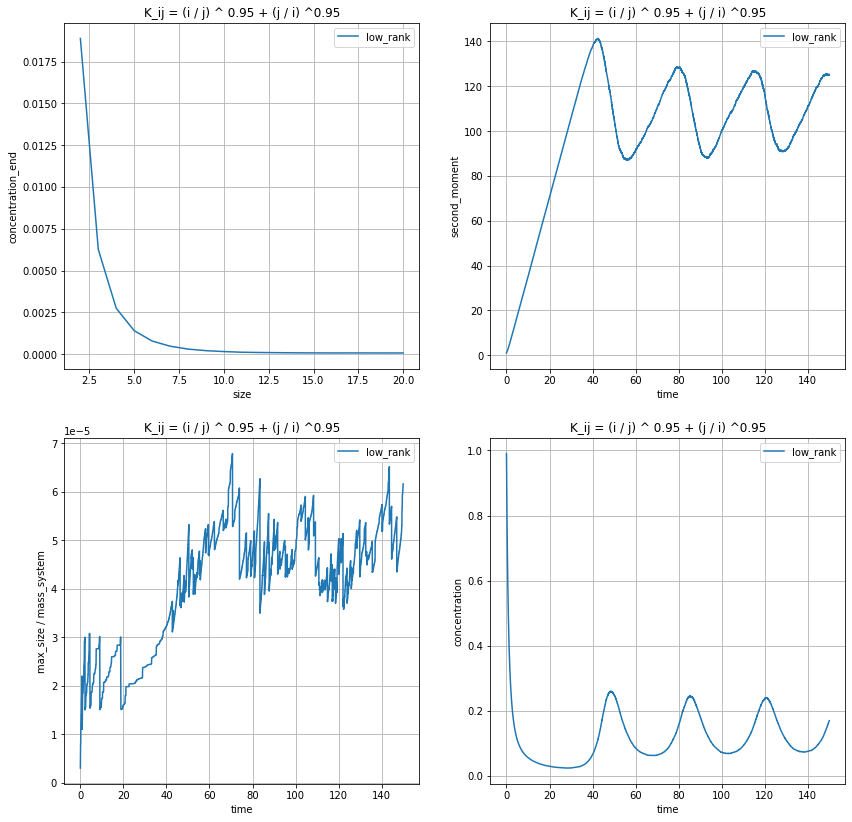

In [101]:
time_lr, second_moment_lr, max_sizes_lr, conc_end_lr, conc_time_lr, special_information_lr, time_ar, second_moment_ar, max_sizes_ar, conc_end_ar, conc_time_ar, special_information_ar = get_data()

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(14, 14)


ax[0, 0].grid()
ax[0, 0].set_xlabel(r'size')
ax[0, 0].set_ylabel(r'concentration_end')
ax[0, 0].set_title(test_group[w]['name'])
start, end = 1, min(len(conc_end_lr), 20)
ax[0, 0].plot(np.arange(1, len(conc_end_lr) + 1)[start:end], conc_end_lr[start:end], label = "low_rank")
ax[0, 0].plot(np.arange(1, len(conc_end_ar) + 1)[start:end], conc_end_ar[start:end], label = "AR")
if 'true_function' in test_group[w]:
    ax[0, 0].plot(np.arange(1, len(conc_end_lr) + 1)[start:end], [test_group[w]["true_function"](k, test_group[w]["max_time"]) for k in range(start, end)], label = 'ideal')
ax[0, 0].legend()


ax[0, 1].grid()
ax[0, 1].set_xlabel(r'time')
ax[0, 1].set_ylabel(r'second_moment')
ax[0, 1].set_title(test_group[w]['name'])
ax[0, 1].plot(time_lr, second_moment_lr, label = "low_rank")
ax[0, 1].plot(time_ar, second_moment_ar, label = "AR")
if 'true_function' in test_group[w]:
    ax[0, 1].plot(time_lr[::10], [test_group[w]["second_moment"](time, 300) for time in time_lr[::10]], label = 'ideal')

ax[0, 1].legend()


ax[1, 0].grid()
ax[1, 0].set_xlabel(r'time')
ax[1, 0].set_ylabel(r'max_size / mass_system')
ax[1, 0].set_title(test_group[w]['name'])
ax[1, 0].plot(time_lr, max_sizes_lr, label = "low_rank")
#ax[1, 0].plot(time_ar, max_sizes_ar, label = "AR")
ax[1, 0].legend()


ax[1, 1].grid()
ax[1, 1].set_xlabel(r'time')
ax[1, 1].set_ylabel(r'concentration')
ax[1, 1].set_title(test_group[w]['name'])
ax[1, 1].plot(time_lr, conc_time_lr, label = "low_rank")
#ax[1, 1].plot(time_ar, conc_time_ar, label = "AR")
ax[1, 1].legend()


print(test_group[w]["name"], '\nRank of kernel:', test_group[w]["rank"],'\nMax_time:' , test_group[w]["max_time"], "\nlog_period: ", test_group[w]["log_period"])
print("Время работы low-rank алгоритма:", special_information_lr[0])
#print("Время работы AR алгоритма:", special_information_ar[0])